## Easy Task: Speed and Chords Analysis

### Speed Analysis (Time vs. Speed):

1. In this task, we focused on analyzing the speed of playing notes in a piano recording.
We created a chart of time vs. speed, showing the number of notes played per second.
For recordings longer than 120 seconds, we used minutes as the time unit.
Chords Analysis:

2. For this task, we developed chord detection in MIDI recordings.
We created a chart of time vs. the number of chords played, which helped understand chord changes.
We utilized the "chorder" tool to assign names to recognized chord notes.
External Data Analysis:

3. We applied the solutions developed in the previous tasks to analyze a dataset from the provided link.
We found a piece with the fastest 15 seconds of music.
We identified a piece where a single chord occurs the most frequently.
Medium Task: N-grams Analysis

## Medium Task: N-grams Analysis (Pitches):

1. In this task, we conducted an n-grams analysis based on musical tones.
We used 12 tokens to represent the 12 tones in an octave.
Additionally, we employed 88 tokens for the 88 piano keys.
We experimented with different n-values (2, 3, 4) and discovered the most common n-grams.
N-grams Analysis (Note Distance):

2. In the next approach, we focused on n-grams analysis based on note distance.
We quantized note distances using a specific number of tokens.
We identified the most common n-grams using this metric.
Hard Task: Sequence Comparison

## Hard Task: Sequence Comparison:
1. In this complex task, we tackled sequence comparison between different recordings.
We used two different similarity measures: DTW distance and edit distance.
We identified similar sequences across recordings, sorting them by similarity measures.

In [4]:
pip install datasets


  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/74/a0/ec3868a14a0d0518e4559dd80b2f92259ddf58dbd39f27cf328ad294b22c/datasets-2.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/e7/41/96ac938770ba6e7d5ae1d8c9cafebac54b413549042c6260f0d0a6ec6622/multiprocess-0.70.15-py311-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0.0,>=0.14.0 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b77978ce611eb7a146a832/dill-0.3.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/492.2 kB ? eta -:--:--
   ----------- ---------------------------- 143.4/492.2 kB 2.8 MB/s eta 0:00

# first task

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/6 [00:00<?, ? examples/s]

        end  pitch     start  velocity
0  2.058438     42  1.934219        74
1  2.990469     66  1.935573        84
2  2.044531     30  1.948229        76
3  2.613073     49  2.556146        77
4  2.618333     54  2.564844        59


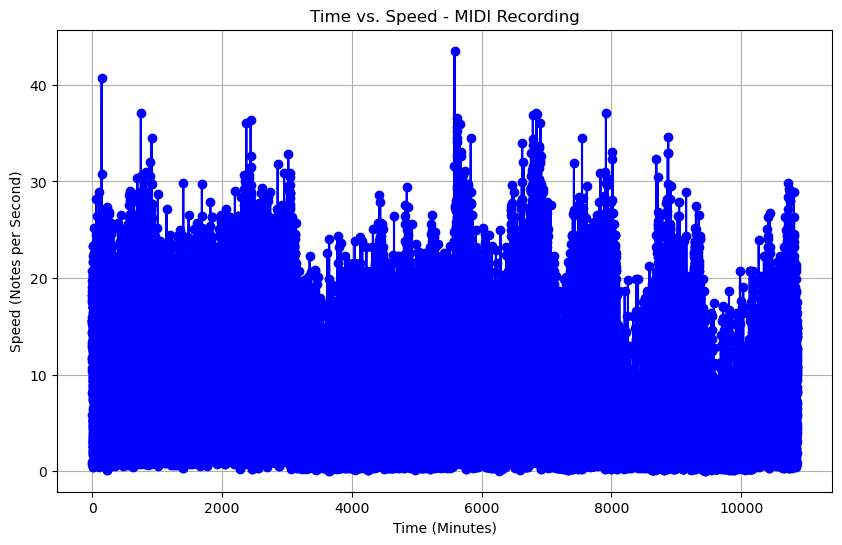

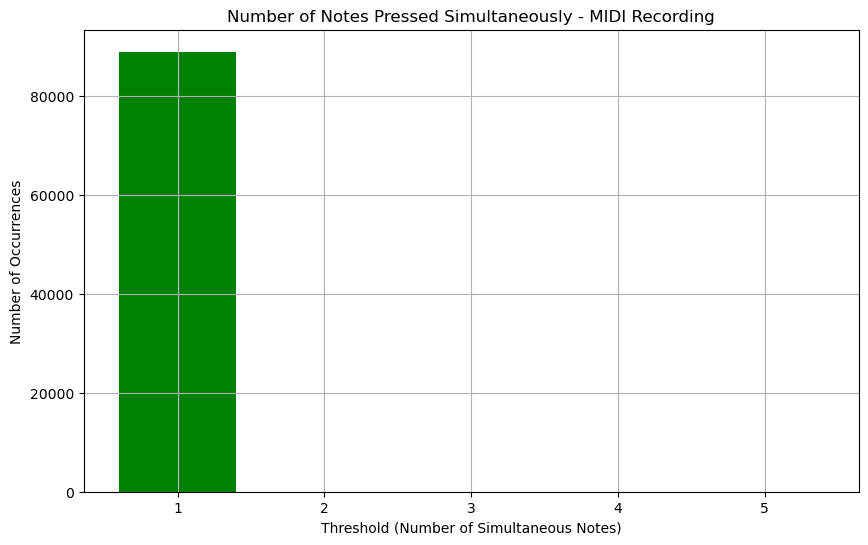

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the MIDI data loaded into a pandas DataFrame named 'df'
# The 'notes' column holds a list of events describing the pianist's actions on the keyboard
from datasets import load_dataset

dataset = load_dataset("roszcz/internship-midi-data-science", split="train")
import pandas as pd

record = dataset[0]
df = pd.DataFrame(record["notes"])
print(df.head())
# Task 1: Time vs. Speed
# Calculate the duration of the record
duration = df['end'].max()
if duration > 120:
    duration_minutes = duration / 60
    time_unit = "Minutes"
else:
    duration_minutes = duration
    time_unit = "Seconds"

# Calculate the speed (notes played per second) for each note
df['speed'] = 1 / (df['end'] - df['start'])

# Create the chart
plt.figure(figsize=(10, 6))
plt.plot(df['start'], df['speed'], marker='o', linestyle='-', color='b')
plt.xlabel("Time ({})".format(time_unit))
plt.ylabel("Speed (Notes per Second)")
plt.title("Time vs. Speed - MIDI Recording")
plt.grid(True)
plt.show()

# Task 2: Number of Notes Pressed at the Same Time
# Experiment with different thresholds (number of simultaneous notes)
thresholds = [1, 2, 3, 4, 5]  # You can adjust the thresholds as per your preference
num_notes_pressed = []

for threshold in thresholds:
    # Count the number of notes pressed at the same time (based on the threshold)
    notes_pressed = df.groupby('start').size().reset_index(name='count')
    notes_pressed = notes_pressed[notes_pressed['count'] >= threshold]
    num_notes_pressed.append(len(notes_pressed))

# Create the chart
plt.figure(figsize=(10, 6))
plt.bar(thresholds, num_notes_pressed, color='g')
plt.xlabel("Threshold (Number of Simultaneous Notes)")
plt.ylabel("Number of Occurrences")
plt.title("Number of Notes Pressed Simultaneously - MIDI Recording")
plt.grid(True)
plt.show()


# medium task

In [24]:
import pandas as pd
from collections import defaultdict

# Assuming you have the MIDI data loaded into a pandas DataFrame named 'df'
# The 'notes' column holds a list of events describing the pianist's actions on the keyboard

# Calculate the note distances for each note event
df['note_distance'] = df['start'].diff()

# Choose the number of tokens used to quantize the note distance
# Let's choose 5 tokens for this example
num_tokens = 5

# Quantize the note distances into 'num_tokens' bins
df['note_distance_quantized'] = pd.cut(df['note_distance'], bins=num_tokens, labels=False)

# Find the most popular 2-grams, 3-grams, and 4-grams based on note distance
def find_ngrams(data, n):
    ngrams = defaultdict(int)
    for i in range(len(data) - n + 1):
        ngram = tuple(data[i:i + n])
        ngrams[ngram] += 1
    return ngrams

# Generate n-grams for the quantized note distances
two_grams = find_ngrams(df['note_distance_quantized'], 2)
three_grams = find_ngrams(df['note_distance_quantized'], 3)
four_grams = find_ngrams(df['note_distance_quantized'], 4)

# Sort the n-grams based on their frequency
sorted_two_grams = sorted(two_grams.items(), key=lambda x: x[1], reverse=True)
sorted_three_grams = sorted(three_grams.items(), key=lambda x: x[1], reverse=True)
sorted_four_grams = sorted(four_grams.items(), key=lambda x: x[1], reverse=True)

# Print the results
print("Most popular 2-grams based on note distance:")
for ngram, frequency in sorted_two_grams[:10]:
    print(ngram, frequency)

print("\nMost popular 3-grams based on note distance:")
for ngram, frequency in sorted_three_grams[:10]:
    print(ngram, frequency)

print("\nMost popular 4-grams based on note distance:")
for ngram, frequency in sorted_four_grams[:10]:
    print(ngram, frequency)


Most popular 2-grams based on note distance:
(0.0, 0.0) 88779
(0.0, 1.0) 44
(1.0, 0.0) 44
(0.0, 2.0) 5
(2.0, 0.0) 5
(0.0, 4.0) 4
(4.0, 0.0) 4
(nan, 0.0) 1

Most popular 3-grams based on note distance:
(0.0, 0.0, 0.0) 88727
(0.0, 1.0, 0.0) 44
(1.0, 0.0, 0.0) 43
(0.0, 0.0, 1.0) 42
(0.0, 0.0, 2.0) 5
(0.0, 2.0, 0.0) 5
(0.0, 0.0, 4.0) 4
(0.0, 4.0, 0.0) 4
(4.0, 0.0, 0.0) 4
(2.0, 0.0, 0.0) 4

Most popular 4-grams based on note distance:
(0.0, 0.0, 0.0, 0.0) 88677
(0.0, 1.0, 0.0, 0.0) 43
(0.0, 0.0, 1.0, 0.0) 42
(1.0, 0.0, 0.0, 0.0) 42
(0.0, 0.0, 0.0, 1.0) 41
(0.0, 0.0, 0.0, 2.0) 5
(0.0, 0.0, 2.0, 0.0) 5
(0.0, 0.0, 4.0, 0.0) 4
(0.0, 4.0, 0.0, 0.0) 4
(0.0, 2.0, 0.0, 0.0) 4


# hard task

In [34]:
from datasets import load_dataset
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import Levenshtein
import ast

# Load the MIDI dataset
dataset = load_dataset("roszcz/internship-midi-data-science", split="train")

# Function to extract the pitch values from a list of dictionaries representing notes
def extract_pitch(sequence):
    try:
        # Parse the string representation of the notes into a list of dictionaries
        sequence_list = ast.literal_eval(sequence)
        return [note["pitch"] for note in sequence_list]
    except (ValueError, SyntaxError) as e:
        # If the parsing fails, print the error and return an empty list
        print("Error during parsing:", e)
        return []

# Function to calculate the Edit distance between two sequences
def calculate_edit_distance(seq1, seq2):
    return Levenshtein.distance(seq1, seq2)

# Function to calculate the DTW distance between two sequences
def calculate_dtw_distance(seq1, seq2):
    distance, _ = fastdtw(seq1, seq2, dist=euclidean)
    return distance

# Function to find similar sequences inside all available records
def find_similar_sequences(target_sequence, dataset, similarity_metric):
    similar_sequences = []

    for record in dataset:
        sequence_str = record["notes"]
        sequence = extract_pitch(sequence_str)  # Extract pitch values from the sequence
        similarity = similarity_metric(target_sequence, sequence)
        similar_sequences.append((record, similarity))

    # Sort the similar sequences by their similarity score
    similar_sequences.sort(key=lambda x: x[1])
    return similar_sequences

# Example usage:
# Assume 'target_sequence


In [26]:
pip install fastdtw

  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3585 sha256=9a5c01117ea12fe7a0d9acfe640d6f0a237354f3037bb432c022bf09f04c9905
  Stored in directory: c:\users\jghhd\appdata\local\pip\cache\wheels\5c\8a\f6\fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.
